# Inverse Linear Regression Proof (Insurance Data)

In this notebook we want to check if both ways of 'inverse linear regression' lead to the same result!
 
Write the function that uses expenses as input and age as output!
* Upload and preprocess the data
* Write a function to compute the Simple Linear Regression weights with sqft_living as output and expenses as input
* Write a function to make predictions of the output given the input feature of $12.000
 
Then write a function that uses sqft_living as input and price as output and invert it!
* Write a function to compute the Simple Linear Regression weights with expenses as output and age as input
* Write a function to make predictions of the input given the output feature of $12.000

# Upload and preprocess the data

Dataset on insurance data (insurance.csv) is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6.

In [27]:
import pandas as pd
data = pd.read_csv('insurance.csv')
# Look at the table to check potential features
data[:10]

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


# Split data into training and testing

In [28]:
from sklearn.model_selection import train_test_split
# Split data set into 80% train and 20% test data 
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)
# Look at the shape to check the split ratio
train_data.shape, test_data.shape

((1070, 7), (268, 7))

# Build a generic simple linear regression function 

Let's build a closed form solution (function) to compute the slope and intercept for a simple linear regression.

In [29]:
def simple_linear_regression(input_feature, output):
    n = len(input_feature)
    # compute the sum of input_feature and output
    x_sum = input_feature.sum()
    y_sum = output.sum()
    # compute the product of the output and the input_feature and its sum
    xy = input_feature * output
    xy_sum = xy.sum()
    # compute the squared value of the input_feature and its sum
    x_squared = input_feature * input_feature
    x_squared_sum = x_squared.sum()
    # use the formula for the slope
    slope = (xy_sum - x_sum * y_sum / n) / (x_squared_sum - x_sum * x_sum / n)
    # use the formula for the intercept
    intercept = y_sum / n - slope * x_sum / n
    return (intercept, slope)

Now let's use that function of a simple regression model for predicting expenses based on bmi - rembember that we train on train_data!

In [54]:
expenses_intercept1, expenses_slope1 = simple_linear_regression(train_data['expenses'], train_data['age'])

print('Intercept: ' + str(expenses_intercept1))
print('Slope: ' + str(expenses_slope1))

Intercept: 34.73920640255653
Slope: 0.00032969640965025706


# Predicting values

With the model parameters 'intercept & slope' we can now write a function to return the predicted output - given the input_feature, slope and intercept:

In [55]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + input_feature * slope
    return predicted_values

Now that we have this function let's make a prediction. 

* What is the estimated expense for an entry according to the age model we estiamted above?

In [68]:
my_expense1 = 17500
estimated_age1 = get_regression_predictions(my_expense1, expenses_intercept1, expenses_slope1)

print('The estimated age for a expense of $%d is %.1f' % (my_expense1, estimated_age1))

The estimated age for a expense of $17500 is 40.5


# Inverse Regression Prediction

In [58]:
age_intercept2, age_slope2 = simple_linear_regression(train_data['age'], train_data['expenses'])

print('Intercept: ' + str(age_intercept2))
print('Slope: ' + str(age_slope2))

Intercept: 3882.8589279511307
Slope: 238.37156754069736


In [59]:
def inverse_regression_predictions(output, intercept, slope):
    # Solve output = intercept + slope * input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (output - intercept) / slope
    return estimated_feature

In [62]:
my_expense2 = 12000
estimated_age2 = inverse_regression_predictions(my_expense2, age_intercept2, age_slope2)

print('The estimated age for an expense of $%.2f is %d.' % (my_expense2, estimated_age2))

The estimated age for an expense of $12000.00 is 34.


In [63]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_value = intercept + input_feature * slope
    return predicted_value

In [70]:
my_age = 40
estimated_expense3 = get_regression_predictions(my_age, age_intercept, age_slope)

print('The estimated expense for an age of %d is $%.2f' % (my_age, estimated_expense3))

The estimated expense for an age of 40 is $13417.72


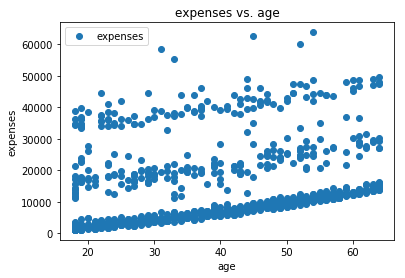

In [72]:
import matplotlib.pyplot as plt

# Plot feature relations
train_data.plot(x='age', y='expenses', style='o')
plt.title('expenses vs. age')
plt.xlabel('age')
plt.ylabel('expenses')
plt.show()

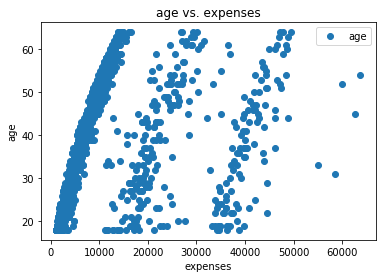

In [73]:
# Plot feature relations
train_data.plot(x='expenses', y='age', style='o')
plt.title('age vs. expenses')
plt.xlabel('expenses')
plt.ylabel('age')
plt.show()